<a href="https://colab.research.google.com/github/pachterlab/CJP_2025/blob/main/notebooks/schematic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import packages
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from scipy.linalg import eigh

In [2]:
# simulated data

sigma_x = 1.0
sigma_y = 1.0

var_x = sigma_x**2
var_y = sigma_y**2

angles_deg = np.arange(0, 181, 1)
angles_rad = np.deg2rad(angles_deg)


unit_vectors = np.column_stack([np.cos(angles_rad),
                                np.sin(angles_rad)])

cov = np.array([[1.0, 0.8],
                [0.8, .8]])
cov_tg = cov


theta_deg = 60                 # rotation angle in degrees
theta = np.deg2rad(theta_deg)   # convert to radians

R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])


cov_bg = cov_tg - np.array([[0.0,0.3],[0.3,0.0]]) # remove some x and y covariance in the background
cov_bg =  R @ cov_bg @ R.T  # rotate the background wrt to the target


# sample
mean = np.array([0.0, 0.0])
n = 1000

rng = np.random.default_rng(42)
samples_bg = rng.multivariate_normal(mean, cov_bg, size=n)
samples_tg = rng.multivariate_normal(mean, cov_tg, size=n)

In [3]:
# get variance along each line

vars_tg = []
vars_bg = []
for v in unit_vectors:
    tg_ = np.dot(samples_tg,v)
    bg_ = np.dot(samples_bg,v)

    vars_tg.append(np.var(tg_))
    vars_bg.append(np.var(bg_))

vars_tg = np.array(vars_tg)
vars_bg = np.array(vars_bg)
rqs = np.array(vars_tg)/np.array(vars_bg)

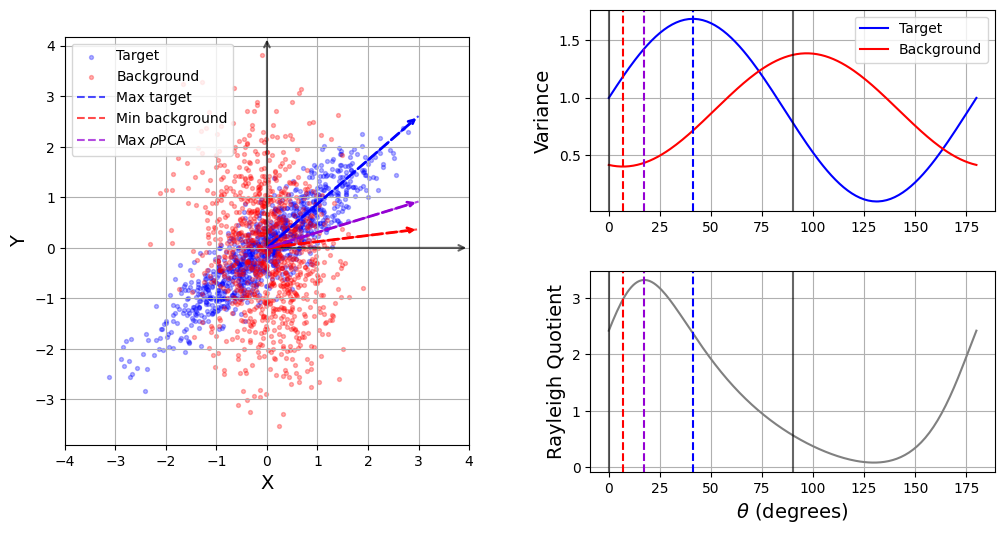

In [5]:
fig = plt.figure(figsize=(12,6))

gs = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[1,1], height_ratios=[1,1], wspace=0.3, hspace=0.3)


ax0 = fig.add_subplot(gs[:,0])


ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,1])

ax0.scatter(samples_tg[:,0], samples_tg[:,1], s=8, alpha=0.3, color='blue',label='Target')
ax0.scatter(samples_bg[:,0], samples_bg[:,1], s=8, alpha=0.3, color='red',label='Background')
ax0.set_xlabel('X',fontsize=14)
ax0.set_ylabel('Y',fontsize=14)
ax0.set_xlim(-4,4)
ax0.set_aspect('equal')
ax0.grid()


ax1.plot(angles_deg, vars_tg, color='blue', label='Target')
ax1.plot(angles_deg, vars_bg, color='red', label='Background')
ax1.set_ylabel('Variance', fontsize=14)
ax1.grid()
ax1.legend(fontsize=10)

ax2.plot(angles_deg, rqs, color='gray')
ax2.set_xlabel(r'$\theta$ (degrees)', fontsize=14)
ax2.set_ylabel('Rayleigh Quotient', fontsize=14)
ax2.grid()

vlines = [angles_deg[np.argmax(vars_tg)],
          angles_deg[np.argmin(vars_bg)],
          angles_deg[np.argmax(rqs)]]

uvs = [unit_vectors[np.argmax(vars_tg)],
       unit_vectors[np.argmin(vars_bg)],
       unit_vectors[np.argmax(rqs)]]

labels = [
    r'Max target',
    r'Min background',
    r'Max $\rho$PCA'
]

colors = ['blue','red','darkviolet']

xs = [np.arange(0,4),np.array([0,0.1,0.2,0.3]),np.array([0,0.1,0.2,0.4])]
xs = [np.arange(4)]*3


ax1.axvline(x=0, color='black',linewidth=1.5,alpha=0.6)
ax1.axvline(x=90, color='black',linewidth=1.5,alpha=0.6)

ax2.axvline(x=0, color='black',linewidth=1.5,alpha=0.6)
ax2.axvline(x=90, color='black',linewidth=1.5,alpha=0.6)



for ax in [ax0]:
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    ax.annotate('', xy=(xlim[1], 0), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5, alpha=0.6))
    ax.annotate('', xy=(0, ylim[1]), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5, alpha=0.6))


for i,val in enumerate(vlines):
    slope = uvs[i][1]/uvs[i][0]
    xline = xs[i]
    yline = xline * slope
    ax0.plot(xline, yline, linestyle='--', label=labels[i], color=colors[i],alpha=0.7)

    ax0.annotate(
        '',
        xy=(xline[-1], yline[-1]),
        xytext=(xline[0], yline[0]),
        arrowprops=dict(
            arrowstyle='->',
            color=colors[i],
            lw=2,
            linestyle='--'
        ),
    )
    ax1.axvline(x=val, linestyle='--', label=labels[i], color=colors[i])
    ax2.axvline(x=val, linestyle='--', label=labels[i], color=colors[i])


ax0.legend()
plt.show()
